In [464]:
import pandas as pd
import numpy as np

# DECISION TREE REGRESSOR

In [465]:
df = pd.read_csv('/Users/pratikdhimal/Developer/Notebook/CourseWorks/CourseWorkFinal/Glassdoor Gender Pay Gap.csv')
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [466]:
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [467]:
df = df[['Age','PerfEval','Seniority','BasePay','Bonus']]

In [468]:
X = df.drop(columns=['Bonus'])
y = df['Bonus']
features_column  = X.columns.tolist() 

In [469]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [470]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(r2_train)
print(r2_test)


1.0
0.843870551530328


### Pre Prunning

In [471]:
param_grid={
    'max_depth' :[None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split':[5,20,30,50,80,100],
    'min_samples_leaf':[1,5,15,20,25]
}



In [472]:
from sklearn.model_selection import GridSearchCV
tree_model = DecisionTreeRegressor()

pre_prunning_model = GridSearchCV(estimator=tree_model,param_grid=param_grid,cv=5,scoring='r2',n_jobs=-1)

pre_prunning_model.fit(X_train,y_train)

print(pre_prunning_model.best_params_)


{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [473]:
y_train_pred = pre_prunning_model.predict(X_train)
y_test_pred =pre_prunning_model.predict(X_test)

In [474]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9260739553970976
0.8804559002490648


In [475]:
import dtreeviz
import graphviz.backend as be
from IPython.display import Image, display_svg,SVG

In [476]:
viz  = dtreeviz.model(pre_prunning_model.best_estimator_,
            X_train,
            y_train,
            feature_names=features_column,
            target_name='Bonus')


In [477]:
# viz.view(scale=2)

# DESCISION TREE CLASSIFIER

## Load Dataset

In [478]:
from sklearn.datasets import load_iris
iris = load_iris()


iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [479]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Check for outliers

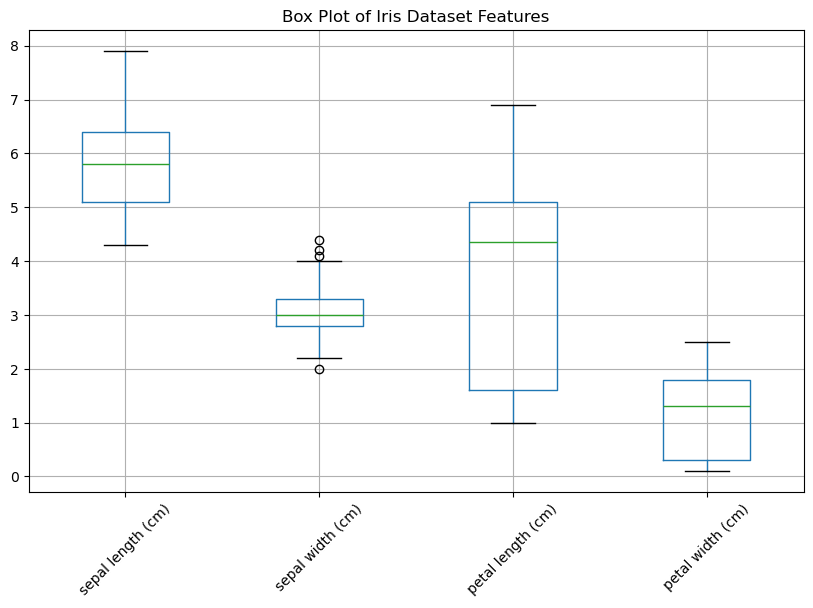

In [480]:
iris_df.boxplot(column=iris.feature_names, figsize=(10, 6))
plt.title('Box Plot of Iris Dataset Features')
plt.xticks(rotation=45)
plt.show()

## Remove Outliers

In [481]:
def remove_outliers(df, column):
    """
    Removes outliers in a specified column of a DataFrame using the IQR method.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name to check for outliers.
    
    Returns:
    DataFrame: A DataFrame without the outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers


In [482]:
iris_df_no_outliers = remove_outliers(iris_df, 'sepal width (cm)')
iris_df_no_outliers
features_iris = iris_df_no_outliers.columns.tolist()

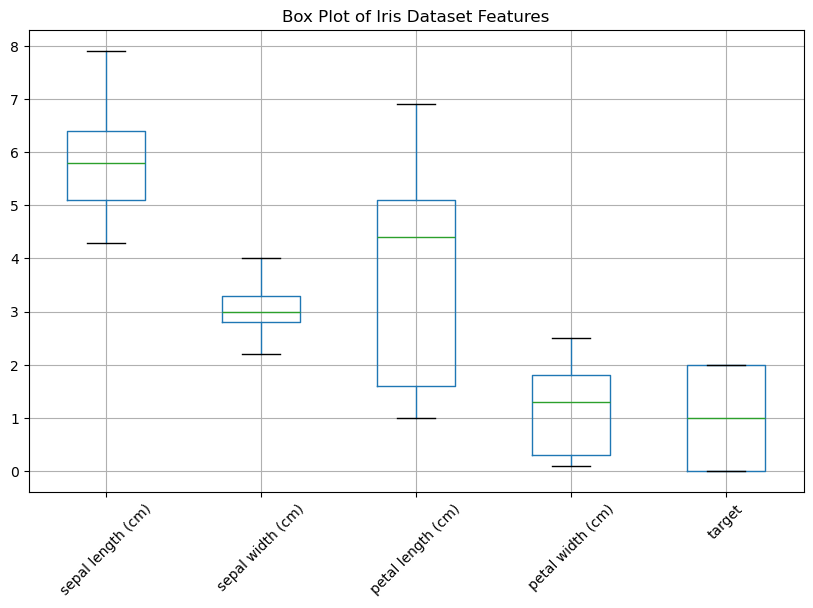

In [483]:
iris_df_no_outliers.boxplot(column=features_iris, figsize=(10, 6))
plt.title('Box Plot of Iris Dataset Features')
plt.xticks(rotation=45)
plt.show()

In [484]:
X = iris_df_no_outliers.drop(columns=['target'])
y = iris_df_no_outliers['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

features_iris_X = iris_df.columns.tolist()
features_iris_X.remove('target')




In [485]:
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  1.0
Test Accuracy:  0.9772727272727273


## Pre Pruning

In [486]:
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10,None],
    'min_samples_split': [4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
}

cv =  GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=grid_params,
                    cv=5,
                    n_jobs=-1)

cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [4, 5, 6, 7, 8, 9, 10]})

In [487]:
best_param = cv.best_params_
best_param

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [488]:

from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(**best_param)
decision_tree_classifier.fit(X_train, y_train)

y_train_pred = decision_tree_classifier.predict(X_train)
y_test_pred = decision_tree_classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(accuracy_train)
print(accuracy_test)

0.9705882352941176
0.9545454545454546


In [489]:
viz  = dtreeviz.model(decision_tree_classifier,
            X_train,
            y_train,
            feature_names=features_iris_X,
            target_name='target',
            class_names=list(iris.target_names))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


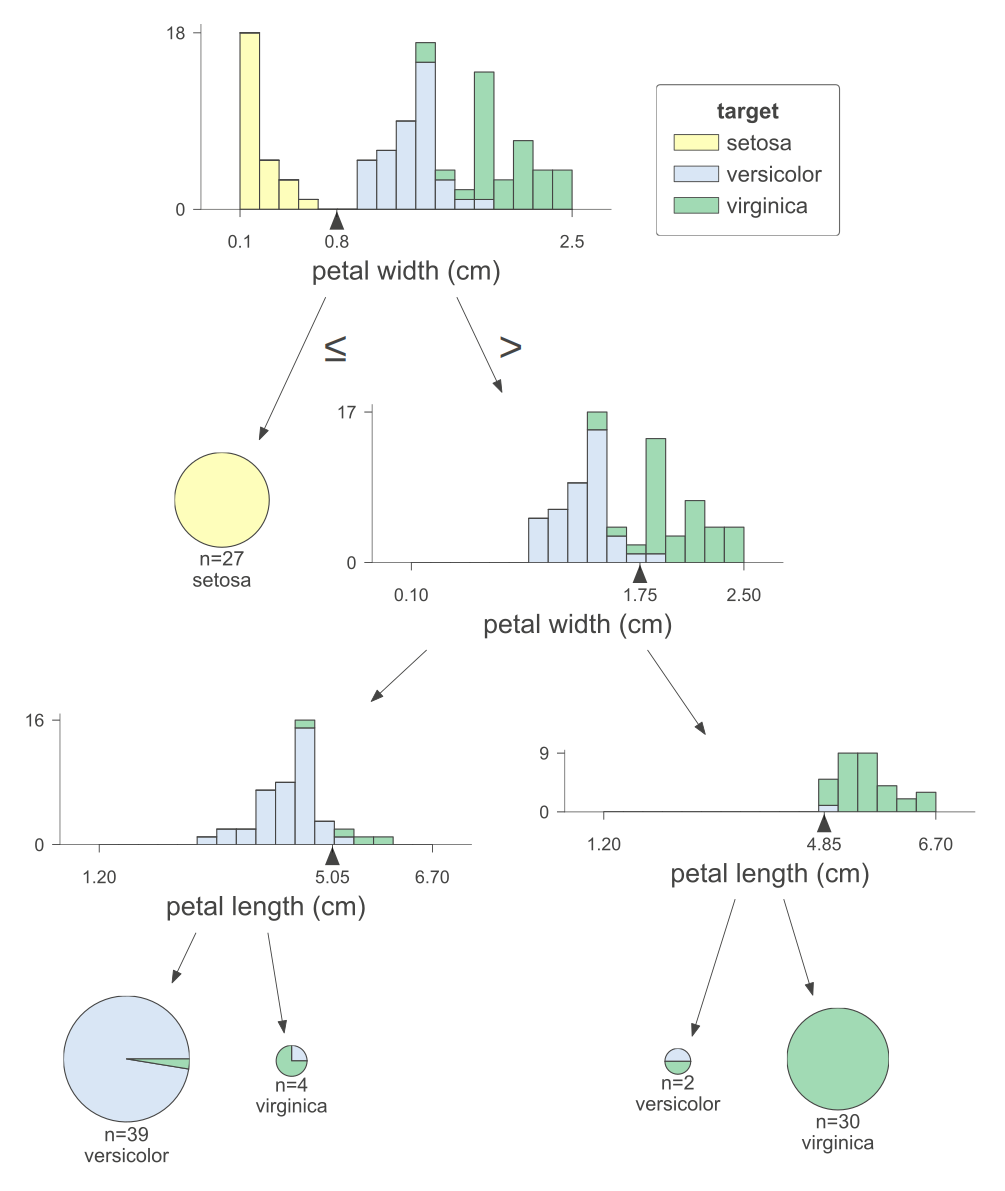

In [490]:
viz.view(scale=3)